In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "d"

In [2]:
file_path = "/kaggle/input/d/aungpyaeap/supermarket-sales/supermarket_sales - Sheet1.csv"
data <- read.csv(file_path)
head(data)

Invoice.ID  Branch City      Customer.type Gender Product.line          
1 750-67-8428 A      Yangon    Member        Female Health and beauty     
2 226-31-3081 C      Naypyitaw Normal        Female Electronic accessories
3 631-41-3108 A      Yangon    Normal        Male   Home and lifestyle    
4 123-19-1176 A      Yangon    Member        Male   Health and beauty     
5 373-73-7910 A      Yangon    Normal        Male   Sports and travel     
6 699-14-3026 C      Naypyitaw Normal        Male   Electronic accessories
  Unit.price Quantity Tax.5.  Total    Date      Time  Payment     cogs  
1 74.69      7        26.1415 548.9715 1/5/2019  13:08 Ewallet     522.83
2 15.28      5         3.8200  80.2200 3/8/2019  10:29 Cash         76.40
3 46.33      7        16.2155 340.5255 3/3/2019  13:23 Credit card 324.31
4 58.22      8        23.2880 489.0480 1/27/2019 20:33 Ewallet     465.76
5 86.31      7        30.2085 634.3785 2/8/2019  10:37 Ewallet     604.17
6 85.39      7        29.8865 627.6165 3/25/2019 18:30 Ewallet     597.73
  gross.margin.percentage gross.income Rating
1 4.761905                26.1415      9.1   
2 4.761905                 3.8200      9.6   
3 4.761905                16.2155      7.4   
4 4.761905                23.2880      8.4   
5 4.761905                30.2085      5.3   
6 4.761905                29.8865      4.1

# A tibble: 6 × 3
  Product.line           Total_Sales Avg_Sales
  <chr>                        <dbl>     <dbl>
1 Electronic accessories      54338.      320.
2 Fashion accessories         54306.      305.
3 Food and beverages          56145.      323.
4 Health and beauty           49194.      324.
5 Home and lifestyle          53862.      337.
6 Sports and travel           55123.      332.


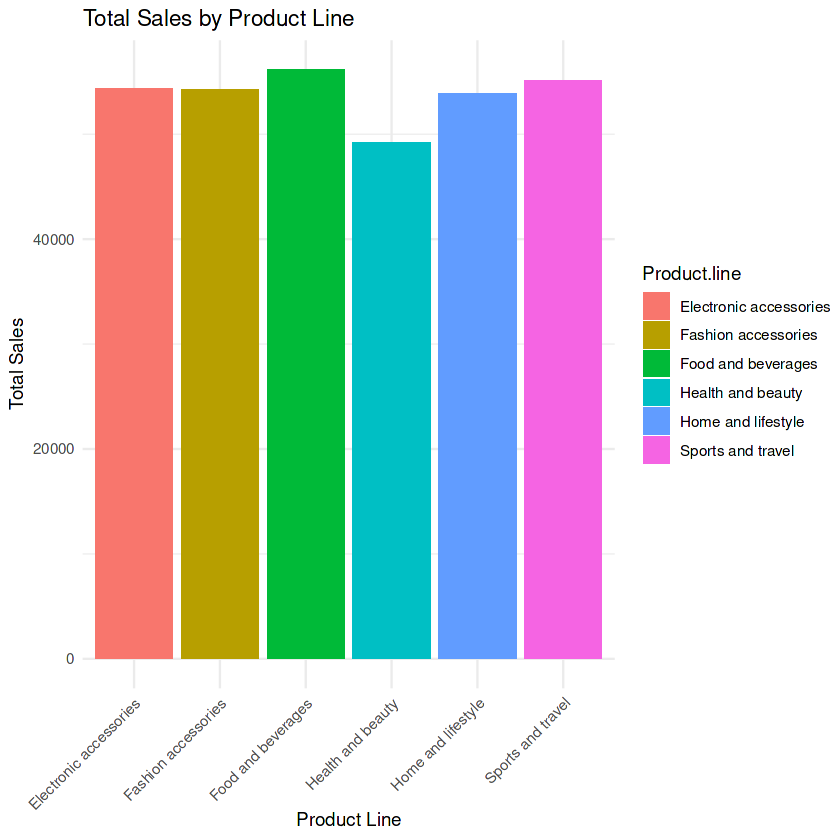

In [3]:
#Summaize sales by Product Line
product_sales <- data %>%
  group_by(Product.line) %>%
  summarise(Total_Sales = sum(Total), Avg_Sales = mean(Total))

print(product_sales)

# Visualize Product Line
ggplot(product_sales, aes(x = Product.line, y = Total_Sales, fill = Product.line)) +
  geom_bar(stat = "identity") +
  labs(title = "Total Sales by Product Line", x = "Product Line", y = "Total Sales") +
  theme_minimal() + theme(axis.text.x = element_text(angle = 45, hjust =1))

1. Consistent Revenue
    - There are positive distribution of revenue across all product lines, with no single category outling the others. This suggests that the supermarket has a well-diversified product
    
    
2. High-Value Categories
    - Home and Lifestyle, sports and travel, and health and beauty categories show relatively higher average sales per transaction. These categories possibly have fewer but more expensive products.
    
    
3. Staple Products
    - Food and Beverages lead in total sales, which is expected given that these are staple items that are purchased frequently. 
    
    
4. Potential Focus Areas
    - Electronic accessories and fashion accessories have slightly lower average sales per transaction, which could indicate room for growth. Possibly a promotions, product bundling could increase the value of transaction of these categories

# A tibble: 3 × 3
  Branch Total_Sales Avg_Sales
  <chr>        <dbl>     <dbl>
1 A          106200.      312.
2 B          106198.      320.
3 C          110569.      337.


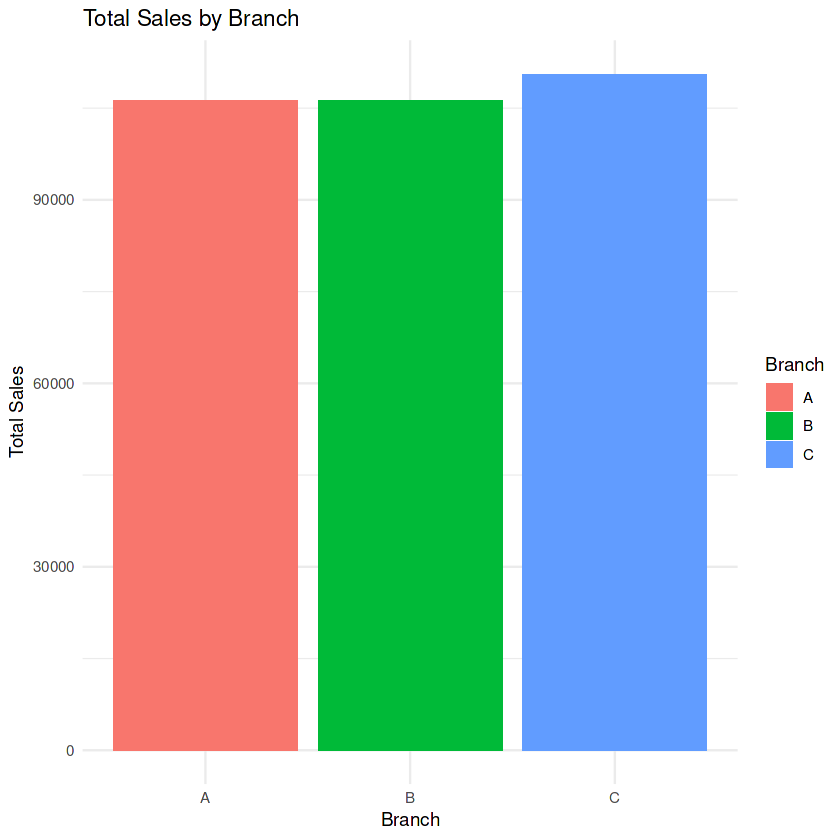

In [4]:
# Summarize sales by Branch
branch_sales <- data %>%
  group_by(Branch) %>%
  summarise(Total_Sales = sum(Total), Avg_Sales = mean(Total))
print(branch_sales)

ggplot(branch_sales, aes(x = Branch, y = Total_Sales, fill = Branch)) +
  geom_bar(stat = "identity") +
  labs(title = "Total Sales by Branch", x = "Branch", y = "Total Sales") +
  theme_minimal()

1. Branch C is performing better overall in terms of both total and average sales, suggesting it might be a larger or more successful branch.

2. Branches A and B have almost total sales, but Branch B edges out in terms of average sales, indicating it might have fewer transactions but higher average transaction values compred to Branch A.

# A tibble: 3 × 3
  Payment     Total_Sales Avg_Sales
  <chr>             <dbl>     <dbl>
1 Cash            112207.      326.
2 Credit card     100767.      324.
3 Ewallet         109993.      319.


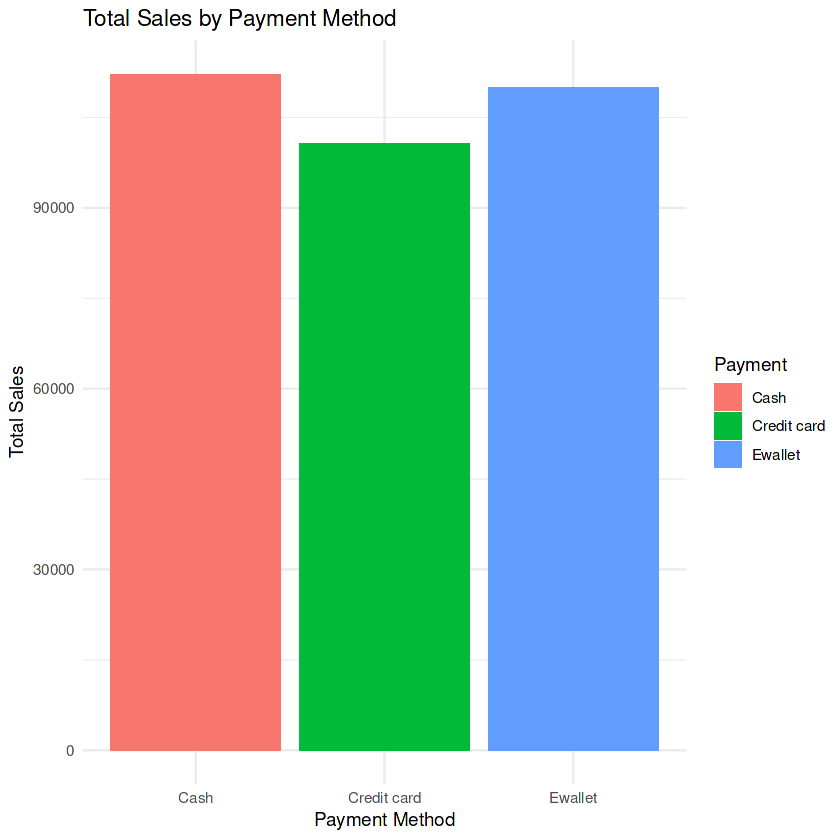

In [5]:
# Summarize sales by payment method
payment_sales <- data %>%
  group_by(Payment) %>%
  summarise(Total_Sales = sum(Total), Avg_Sales = mean(Total))

print(payment_sales)

# Visualize Payment method
ggplot(payment_sales, aes(x = Payment, y = Total_Sales, fill = Payment)) +
  geom_bar(stat = "identity") +
  labs(title = "Total Sales by Payment Method", x = "Payment Method", y = "Total Sales") +
  theme_minimal()

1. Cash payments lead in both total and average sales, which could suggest a preference of cash transactions or that higher-value purhcases are more often made with cash.

2. Credit card payments, while contributing the lowest total sales, have an average sales value very close to Cash, indicating that it's still a signifacnt method in terms os transaction value.

3. Ewallet has the lowest average sales, and the total sales are also somewhat lower compared to Cash, but it's skill competitive, likely indicating a modern or technogically familiar customer base.

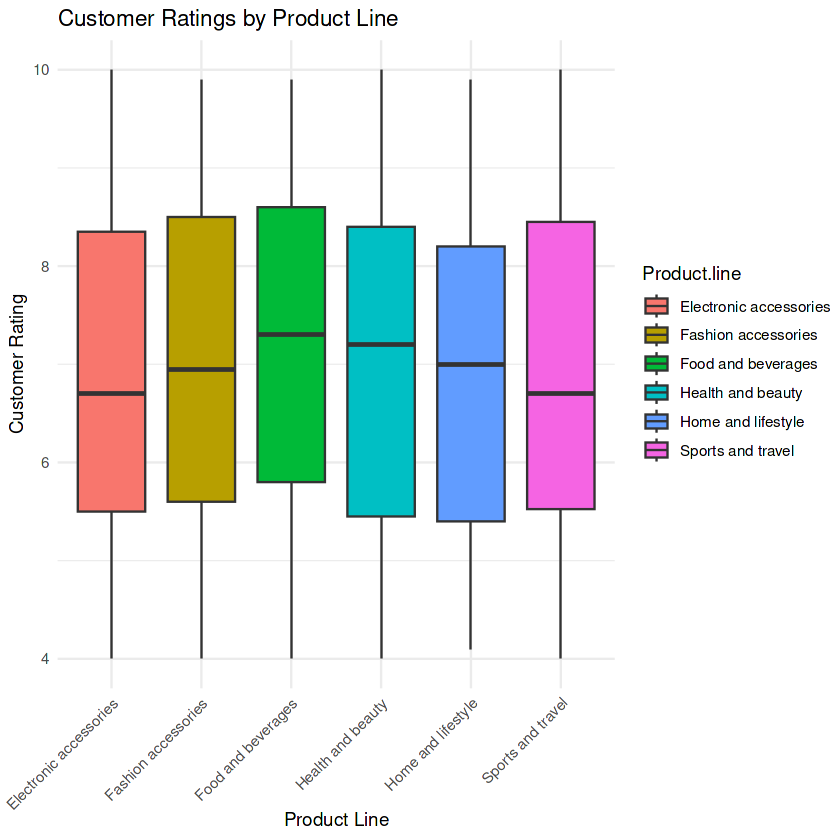

In [6]:
# Comparing customer ratings by product line
ggplot(data, aes(x = Product.line, y = Rating, fill = Product.line)) +
  geom_boxplot() +
  labs(title = "Customer Ratings by Product Line", x = "Product Line", y = "Customer Rating") +
  theme_minimal() + theme(axis.text.x = element_text(angle = 45, hjust =1))

In [7]:
# Correlation analysis by product line
correlation_by_product <- data %>%
  group_by(Product.line) %>%
  summarise(Correlation = cor(Total, Rating, use="complete.obs"))
print(correlation_by_product)

# A tibble: 6 × 2
  Product.line           Correlation
  <chr>                        <dbl>
1 Electronic accessories     -0.138 
2 Fashion accessories         0.0902
3 Food and beverages         -0.0424
4 Health and beauty           0.0122
5 Home and lifestyle         -0.0818
6 Sports and travel          -0.0532


1. Fashion accessories has the strongest positive correlation, suggesting that sales in this category tend to rise slightly with the other variable.

2. Electronic accessories has the strongest negative correlation, indicating that as the other variable increases, sales in this category tend to decline slightly.

Overall, none of the correlations are particularly strong, suggesting that the other variable doesn't have a strong direct relationship with any particular product line.

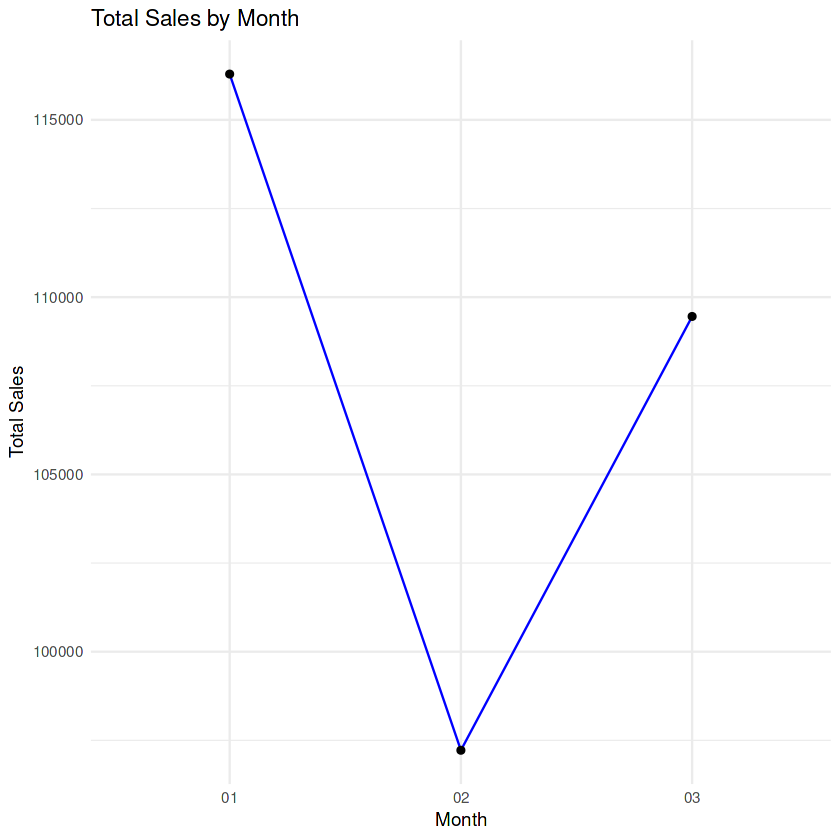

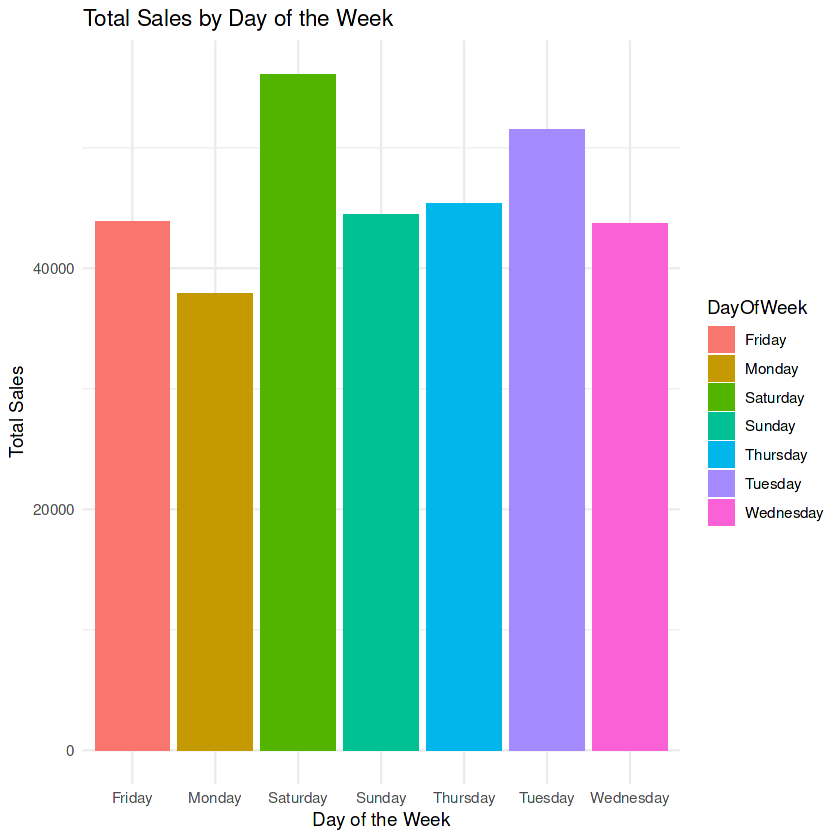

In [8]:
# Time series analysis
# Convert Date column to Date format and extract month and day of the week
data$Date <- as.Date(data$Date, format="%m/%d/%Y")
data$Month <- format(data$Date, "%m")
data$DayOfWeek <- weekdays(data$Date)

# Summarize sales by month
monthly_sales <- data %>%
  group_by(Month) %>%
  summarise(Total_Sales = sum(Total))

ggplot(monthly_sales, aes(x = Month, y = Total_Sales, group = 1)) +
  geom_line(color = "blue") +
  geom_point() +
  labs(title = "Total Sales by Month", x = "Month", y = "Total Sales") +
  theme_minimal()

# Summarize sales by day of the week
weekday_sales <- data %>%
  group_by(DayOfWeek) %>%
  summarise(Total_Sales = sum(Total))

# Bar plot of total sales by day of the week
ggplot(weekday_sales, aes(x = DayOfWeek, y = Total_Sales, fill = DayOfWeek)) +
  geom_bar(stat = "identity") +
  labs(title = "Total Sales by Day of the Week", x = "Day of the Week", y = "Total Sales") +
  theme_minimal()

In [9]:
# Analyze everage sales per transaction
data$SalesPerTransaction <- data$Total / data$Quantity
summary(data$SalesPerTransaction)

data$ProfitMargin <- (data$Total - data$cogs) / data$Total
summary(data$ProfitMargin)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.58   34.52   57.99   58.46   81.83  104.96 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.04762 0.04762 0.04762 0.04762 0.04762 0.04762 

In [10]:
# predictive future total sales
library(randomForest)

model <- randomForest(Total ~ Product.line + Unit.price + Quantity + Payment + Gender + Customer.type, data=data)

print(model)

randomForest 4.7-1.1



Type rfNews() to see new features/changes/bug fixes.




Attaching package: ‘randomForest’




The following object is masked from ‘package:dplyr’:

    combine




The following object is masked from ‘package:ggplot2’:

    margin





Call:
 randomForest(formula = Total ~ Product.line + Unit.price + Quantity +      Payment + Gender + Customer.type, data = data) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 2

          Mean of squared residuals: 2302.892
                    % Var explained: 96.19


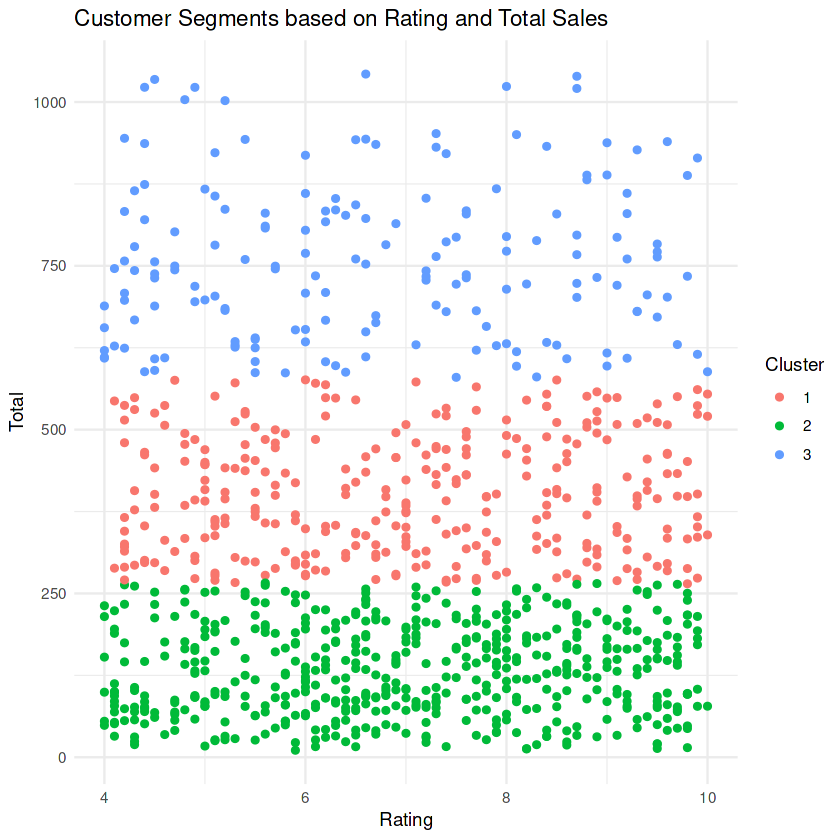

In [11]:
# customer segmentation
# Load necessary library
library(cluster)

# Select relevant columns for segmentation
segmentation_data <- data %>%
  select(Total, Quantity, Unit.price, Rating)

# Perform K-means clustering
set.seed(123)
clusters <- kmeans(segmentation_data, centers = 3)

# Add cluster labels to the data
data$Cluster <- as.factor(clusters$cluster)

# Visualize the clusters
ggplot(data, aes(x = Rating, y = Total, color = Cluster)) +
  geom_point() +
  labs(title = "Customer Segments based on Rating and Total Sales") +
  theme_minimal()